## Support Vector Machines

### Import diabetes dataset and read the columns. Split the dataset into test and train. Scale it using MinMaxScaler

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
##import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
diab_df=pd.read_csv('diabetes.csv')

In [3]:
diab_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diab_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
print("Mean",diab_df.mean())


print("Median",diab_df.median())

Mean Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64
Median Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64


In [6]:
#diab_df['Glucose']=diab_df[['Glucose']].apply(impute_mean)
diab_df['Glucose']=diab_df['Glucose'].replace(0,120)
diab_df['SkinThickness']=diab_df['SkinThickness'].replace(0,20)
diab_df['Insulin']=diab_df['Insulin'].replace(0,79)
diab_df['BloodPressure']=diab_df['BloodPressure'].replace(69,72)
diab_df['BMI']=diab_df['BMI'].replace(0,31)
diab_df.iloc[2]

Pregnancies                   8.000
Glucose                     183.000
BloodPressure                64.000
SkinThickness                20.000
Insulin                      79.000
BMI                          23.300
DiabetesPedigreeFunction      0.672
Age                          32.000
Outcome                       1.000
Name: 2, dtype: float64

In [7]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

#scaler = preprocessing.MinMaxScaler()

target = diab_df["Outcome"]
features = diab_df.drop(["Outcome"], axis=1)

scaler = MinMaxScaler()
scaled_X_train_df = scaler.fit_transform(features)
#scaled_y_train_df = scaler.fit_transform(y_train)

from sklearn.model_selection import train_test_split

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix



X_train, X_test, y_train, y_test = train_test_split(scaled_X_train_df,target, test_size = 0.2, random_state = 10)

### Train the model and find accuracy

In [8]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= 0.1, kernel='linear', gamma= 1)
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.758957654723127
0.7012987012987013


### Use hyperparameters for model tuning. Try with various values of C and kernel and find the best model. Use Grid search for this purpose. 

#### Try for C value 0.1, 0.5, 1, 5, 10
#### Try for kernels linear, rbf, poly, sigmoid
#### use cv=3

In [9]:
# Necessary imports: 
##from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn import metrics
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
##from sklearn import svm, grid_search

In [11]:
##,'rbf','poly','sigmoid'



##kernel=['linear','rbf','poly','sigmoid']
##for i in kernel:
parameters = {'kernel':['linear','rbf','poly','sigmoid'],'C':[0.1,0.5,1,5,10],'gamma':['scale']}
grid_search = GridSearchCV(SVC(), param_grid=parameters, cv=3,refit = True, verbose=2)
grid_search.fit(features, target)
print('best parameter',grid_search.best_params_)
print('Best Estimator',grid_search.best_estimator_)

    
print('Best C value for each kernel as below')
print('C = 10, kernel =linear')
print('C=1, kernel = rbf')
print('C=10, kernel = poly')
print('C=0.1 , kernel=Sigmoid')   


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.1, gamma=scale, kernel=linear ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ C=0.1, gamma=scale, kernel=linear, total=   0.6s
[CV] C=0.1, gamma=scale, kernel=linear ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV] ................ C=0.1, gamma=scale, kernel=linear, total=   0.8s
[CV] C=0.1, gamma=scale, kernel=linear ...............................
[CV] ................ C=0.1, gamma=scale, kernel=linear, total=   1.3s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=rbf ..................................
[CV] ................... C=0.1, gamma=scale, kernel=rbf, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=poly .................................
[CV] .................. C=0.1, gamma=scale, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=poly .................................
[CV] .................. C=0.1, gamma=scale, kernel=poly, total=   0.0s
[CV] C=0.1, gamma=scale, kernel=poly .................................
[CV] .

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  4.3min finished


best parameter {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best Estimator SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
C = 10, kernel =linear
C=1, kernel = rbf
C=10, kernel = poly
C=0.1 , kernel=Sigmoid


### Report your findings on the best model

In [ ]:
print('Best Model : C = 10 , kernal = Linear')

#### Use the best params and classify test data and report the findings

In [16]:
##,'rbf','poly','sigmoid'

print('C = 10, kernel =linear')
print('C=1, kernel = rbf')
print('C=10, kernel = poly')
print('C=0.1 , kernel=Sigmoid')

C=[10,1,10,0.1]
kernel=['linear','rbf','poly','sigmoid']
cnt=0

for i in C:
    svc_model = SVC(C= i, kernel=kernel[cnt], gamma= 1)
    svc_model.fit(X_train, y_train)
    prediction = svc_model.predict(X_test)
    # check the accuracy on the training set
    print("Score for kernel=",kernel[cnt])
    print(svc_model.score(X_train, y_train))
    print(svc_model.score(X_test, y_test))
    print('\n')
    cnt=cnt+1

C = 10, kernel =linear
C=1, kernel = rbf
C=10, kernel = poly
C=0.1 , kernel=Sigmoid
Score for kernel= linear
0.7768729641693811
0.7467532467532467


Score for kernel= rbf
0.7866449511400652
0.7532467532467533


Score for kernel= poly
0.8061889250814332
0.7337662337662337


Score for kernel= sigmoid
0.6596091205211726
0.6168831168831169




In [12]:
print('GridSearch CV Predicts C=10 & Kernel - Linear will give best results')
print('For this dataset we are getting better accuracy for C= 1 & kernel = rbf . This model gives good accuracy score for training as well as test data when comparing to other models')

GridSearch CV Predicts C=10 & Kernel - Linear will give best results
For this dataset we are getting better accuracy for C= 1 & kernel = rbf . This model gives good accuracy score for training as well as test data when comparing to other models


## Recommendation systems - Collaborative filtering

#### About Book Crossing Dataset
This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0

#### Link to dataset files
http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

#### Objective
This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches

### Import all the necessary libraries and datasets

Import books.csv, users.csv, ratings.csv

Use ";" as separator while importing the datasets.

Use encoding='latin-1' and error_bad_lines=False while importing the datasets.

Example: df = pd.read_csv("df.csv", sep=";", error_bad_lines=False, encoding="latin-1")

books dataset columns - 'ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL'

users dataset columns - 'userID', 'Location', 'Age'

ratings dataset columns - 'userID', 'ISBN', 'bookRating'

Check shape of each dataset using shape function

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import pairwise_distances
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import re
import seaborn as sns

In [40]:
#Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']


b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [172]:

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

In [120]:
users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

### Drop last three columns containing image URLs which will not be required for analysis

In [41]:
books.drop(['imageUrlS', 'imageUrlM', 'imageUrlL'],axis=1,inplace=True)

In [13]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


### check the unique values of yearOfPublication

In [42]:
books.info()
books['yearOfPublication'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
ISBN                 271360 non-null object
bookTitle            271360 non-null object
bookAuthor           271359 non-null object
yearOfPublication    271360 non-null object
publisher            271358 non-null object
dtypes: object(5)
memory usage: 10.4+ MB


array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.
Also some of the entries are strings and same years have been entered as numbers in some places

### Check the rows having 'DK Publishing Inc' as yearOfPublication and drop those rows

In [44]:
books=books[books.yearOfPublication !='DK Publishing Inc']

books['yearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

### Drop rows with yearOfPublication as 'Gallimard' and 'DK Publishing Inc'

In [ ]:
books=books[books.yearOfPublication !='Gallimard']

### Change the datatype of yearOfPublication to 'int32'

In [52]:
books['yearOfPublication'].isna().sum()
books['yearOfPublication']=books['yearOfPublication'].astype('int32')
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271357 entries, 0 to 271359
Data columns (total 5 columns):
ISBN                 271357 non-null object
bookTitle            271357 non-null object
bookAuthor           271356 non-null object
yearOfPublication    271357 non-null int32
publisher            271355 non-null object
dtypes: int32(1), object(4)
memory usage: 11.4+ MB


### drop NaNs in 'publisher' column

In [60]:
books=books.dropna(axis=0)
books.info()
books.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271354 entries, 0 to 271359
Data columns (total 5 columns):
ISBN                 271354 non-null object
bookTitle            271354 non-null object
bookAuthor           271354 non-null object
yearOfPublication    271354 non-null int32
publisher            271354 non-null object
dtypes: int32(1), object(4)
memory usage: 11.4+ MB


ISBN                 0
bookTitle            0
bookAuthor           0
yearOfPublication    0
publisher            0
dtype: int64

### Users dataset:

### List out the unique age values from age column

In [121]:
users.info()
users['Age'].unique()
users['Age'].isna().sum()
users['Age'].isin(['nan']).sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


110762

### Values below 5 and above 90 do not make much sense for our book rating case. Hence replace these by NaNs

In [131]:
##users['Age'].replace((users['Age']<5),0)
users.loc[(users['Age'] < 5), 'Age'] = 0.0
users.loc[(users['Age'] > 90 ), 'Age'] = 0.0
##users['Age'].isna().sum()
##users['Age']=users['Age'].astype('int32')

In [134]:
users['Age']=users['Age'].replace('NaN',35)



### Replace null values with mean in Age column and  change datatype to int32

In [136]:
users['Age'].isna().sum()
##users['Age'].isin([0]).sum()

110762

In [140]:
users['Age'] = users['Age'].replace(np.nan, 35)
users.head()
users['Age'] =users['Age'].astype('int')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         278858 non-null int32
dtypes: int32(1), int64(1), object(1)
memory usage: 5.3+ MB


### Ratings dataset

Ratings dataset will have n_users*n_books entries.

In [174]:
n_users = users.shape[0]
n_books = books.shape[0]
print(n_users * n_books)
ratings_new=[];

75669233732


### Ratings dataset should have books only which exist in our books dataset. Create a new dataset which has only ratings of books present in books dataset. Use ISBN column as common column. Hint: check isin()

In [176]:

##ratings_new=ratings['ISBN'].isin(books['ISBN'])

ratings_new=ratings[ratings['ISBN'].isin(books['ISBN'])]
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
userID        1149780 non-null int64
ISBN          1149780 non-null object
bookRating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


### Check the old ratings and new ratings shape

In [177]:
print(ratings.shape)
print(ratings_new.shape)

(1149780, 3)
(1031129, 3)


It can be seen that many rows having book ISBN not part of books dataset got dropped off

### Similarly, the ratings dataset should contain information only about users present in Users dataset. Filter out records of only those users present in users dataset from the ratings dataset. Use userID as the common column. Hint: check isin() 

In [180]:
ratings_new1=ratings[ratings['userID'].isin(users['userID'])]

In [181]:
print(ratings_new1.shape)

(1149780, 3)


### Check unique book ratings

In [182]:
np.unique(ratings_new.bookRating)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

### Segregate dataset into two. One with only 0 ratings and the rest with other ratings.

In [184]:
rating_zero=ratings_new[ratings_new.bookRating==0]
rating_other=ratings_new[ratings_new.bookRating!=0]

In [193]:
rating_other['bookRating'].value_counts()

8     91803
10    71225
7     66401
9     60776
5     45355
6     31687
4      7617
3      5118
2      2375
1      1481
Name: bookRating, dtype: int64

### Plot the ratings data using countplot. Use bookRating in X axis

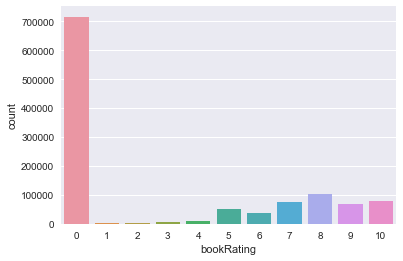

In [194]:
sns.set(style="darkgrid")

ax = sns.countplot(x="bookRating", data=ratings)


### For more accurate results only consider users who have rated atleast 100 books

Take value counts of userId column into a separate Series or DF.

From ratings dataset having ratings 1 to 9, filter only rows for those users who have rated atleast 100 times.

Use isin.

example: 

df_cnt =  df.column.value_counts()

ratings_df = ratings_df[ratings_df.column.isin(df_cnt[df_cnt >=100].index)]

In [206]:
df_cnt=rating_other.userID.value_counts()
rating_other = rating_other[rating_other.userID.isin(df_cnt[df_cnt >=100].index)]

In [207]:
rating_other.shape

(103269, 3)

### Generating ratings matrix from explicit ratings table

Since NaNs cannot be handled by training algorithms, replacing those by 0, which indicates absence of ratings.

Example.

ratings_matrix = ratingdf.pivot(index='userID', columns='ISBN', values='bookRating').fillna(0)

In [221]:
ratings_matrix =rating_other.pivot(index='userID', columns='ISBN', values='bookRating').fillna(0)
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()
##ratings_matrix.isnull().sum()

(449, 66572)


ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Import svds from scipy.sparse.linalg and pass the ratings matrix to it with k=50

Example: U, sigma, Vt = svds(ratings_matrix, k = 50)

Take only the diag value from sigma and do a dot product of the same with U. 

Do another dot product of the result with V. 

Assign the final resultant matrix to another new matrix. 

Convert this matrix to a dataframe with columns as that of the above ratings_matrix. The ratings_matrix was calculated above using the pivot() function of the dataframe.

In [225]:
from numpy import array
from numpy import diag
from numpy import zeros
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import svds, eigs

In [234]:

U, sigma, VT=svds(ratings_matrix,k=50)
B=U.dot(diag(sigma))
res=B.dot(VT)
res_new=res


In [250]:
ratings_svd=pd.DataFrame(res_new)



ratings_svd=ratings_svd.set_index(ratings_matrix.index)
ratings_svd=ratings_svd.set_axis(ratings_matrix.columns, axis=1, inplace=False)


In [252]:

ratings_svd.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,0.025341,-0.002146,-0.001431,-0.002146,-0.002146,0.002971,-0.003920,0.007035,0.007035,0.012316,...,0.000180,0.000226,0.042081,-0.016804,-0.080028,0.004746,0.028314,0.000120,-0.001693,0.067503
2110,-0.010012,-0.003669,-0.002446,-0.003669,-0.003669,0.001075,0.001440,-0.003500,-0.003500,0.001612,...,-0.000363,0.000403,0.008142,0.001104,-0.029224,0.000999,0.002363,-0.000242,0.000029,-0.013059
2276,-0.015054,-0.015457,-0.010304,-0.015457,-0.015457,0.007281,-0.014033,0.011941,0.011941,0.011796,...,-0.000455,0.001907,0.047982,0.005737,0.117859,0.006945,0.003119,-0.000304,0.009009,-0.057692
4017,-0.021499,0.035602,0.023735,0.035602,0.035602,0.030307,0.024215,-0.001053,-0.001053,0.067579,...,0.002971,0.009912,0.086248,-0.008818,0.016154,0.028848,-0.000125,0.001981,0.031201,-0.046664
4385,0.002077,-0.007965,-0.005310,-0.007965,-0.007965,0.002947,0.003057,0.000231,0.000231,0.006080,...,0.002120,0.001597,-0.012181,0.009420,0.673459,0.002591,-0.008229,0.001413,0.004918,0.047773


### Take a particular user id - user id=2

In [311]:
#Print the user id associated with the second record in the dataframe
user_id=1
sorted_user_prediction=ratings_svd.iloc[user_id].sort_values(ascending=False)

In [312]:
#sort the predictions of the user chosen into descending order from the predicted df above. 
#You will get a series. Hint: use iloc[user_id]
sorted_user_prediction.head()

ISBN
059035342X    0.682444
0345370775    0.368946
0345384911    0.333624
043935806X    0.333209
044021145X    0.329336
Name: 2110, dtype: float64

### Get all books that this particular user has interacted with.

Hint: filter the ratings df associated with ratings 1 to 9 for this user id alone. Filter using the userID column and pass the userID obtained above from the ratings matrix.

Once the user_data is obtained, you will get a dataframe with userID = user ID value and ISBN and Ratings.

In [313]:
user_data = rating_other[rating_other.userID==2110]

In [314]:
user_data.head()
user_data.shape

(103, 3)

### Get the book data for this particular user. For this you need to filter using the ISBN column present in the above userdata dataframe

In [315]:
book_data=books[books.ISBN.isin(user_data.ISBN)]
##user_data.ISBN.shape

book_data.shape


(103, 5)

### Merge both the book data and user data as a single dataframe. Hint: Use merge function. 
#### Check how many books the user has rated. Hint: use shape

In [316]:
user_full_info=user_data.merge(book_data)
user_full_info.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,2110,0060987529,7,Confessions of an Ugly Stepsister : A Novel,Gregory Maguire,2000,Regan Books
1,2110,0064472779,8,All-American Girl,Meg Cabot,2003,HarperTrophy
2,2110,0140022651,10,Journey to the Center of the Earth,Jules Verne,1965,Penguin Books
3,2110,0142302163,8,The Ghost Sitter,Peni R. Griffin,2002,Puffin Books
4,2110,0151008116,5,Life of Pi,Yann Martel,2002,Harcourt


In [317]:
user_id=2110
recommendations = (books[~books['ISBN'].isin(user_full_info['ISBN'])].
                   merge(pd.DataFrame(sorted_user_prediction).reset_index(), how = 'left', left_on = 'ISBN',right_on = 'ISBN')).rename(columns = {user_id: 'Predictions'})

In [318]:
print(recommendations.shape)
recommendations.head()

(271251, 6)


,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,Predictions
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,NaN
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0.000883
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,NaN
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,-0.001017
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,NaN


### Get top 10 recommendations for above given userID

#### Use Predictions column and sort the same as descending order

In [327]:
recommendations.sort_values(by='Predictions',ascending=False).head(10)

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,Predictions
1192,0345370775,Jurassic Park,Michael Crichton,1999,Ballantine Books,0.368946
6184,0345384911,Crystal Line,Anne McCaffrey,1993,Del Rey Books,0.333624
5458,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic,0.333209
455,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group,0.329336
2031,0451151259,Eyes of the Dragon,Stephen King,1988,Penguin Putnam~mass,0.313295
5383,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic,0.305088
3413,0439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,Scholastic,0.290587
976,0380759497,Xanth 15: The Color of Her Panties,Piers Anthony,1992,Eos,0.278563
2435,0345353145,Sphere,MICHAEL CRICHTON,1988,Ballantine Books,0.250941
6048,0451167317,The Dark Half,Stephen King,1994,Signet Book,0.249254
